<a href="https://colab.research.google.com/github/prabal4546/Algorithmic-Analysis-of-TSP/blob/main/DAA_PROJECT_Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download Dataset from: https://drive.google.com/drive/folders/1dDDAguhA1PPK4vjUT7on8IGaR2bV28C0?usp=sharing

# Loading Dataset and Preprocessing

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving att48_s.txt to att48_s (1).txt
Saving att48_d.txt to att48_d (1).txt
Saving att48_xy.txt to att48_xy (1).txt


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

coordinates = np.loadtxt("att48_xy.txt", dtype=int)
solutionTour = np.loadtxt("att48_s.txt", dtype=int)
distanceMatrix = np.loadtxt("att48_d.txt", dtype=int)


In [ ]:

# Plot the cities
plt.scatter(coordinates[:, 0], coordinates[:, 1], color='blue', marker='o')
for i, txt in enumerate(range(1, 49)):
    plt.annotate(txt, (coordinates[i, 0], coordinates[i, 1]), fontsize=9, ha='right')

# Plot the solution tour
tourCoords = coordinates[solutionTour - 1]
plt.plot(tourCoords[:, 0], tourCoords[:, 1], color='red', linestyle='-', linewidth=1, alpha=0.6)

plt.title("Visualization of 48 US State Capitals with Solution Tour")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.show()


In [ ]:
import plotly.graph_objects as go

city_scatter = go.Scatter(x=coordinates[:, 0], y=coordinates[:, 1],
                          mode='markers+text',
                          marker=dict(color='blue', size=7),
                          text=[str(i) for i in range(1, len(coordinates)+1)],
                          textposition="top center",
                          name='Cities')

# Create a line plot for the solution tour
tourCoords = coordinates[solutionTour - 1]
tour_line = go.Scatter(x=tourCoords[:, 0], y=tourCoords[:, 1],
                       mode='lines',
                       line=dict(color='red', width=2),
                       name='Solution Tour')

# Combine both plots
fig = go.Figure(data=[city_scatter, tour_line])

# Update layout (title, labels, grid)
fig.update_layout(title="Visualization of 48 US State Capitals with Solution Tour",
                  xaxis_title="X Coordinate",
                  yaxis_title="Y Coordinate",
                  showlegend=False)

# Show the figure
fig.show()

# Brute-Force

In [ ]:
%%time

import itertools


n_cities = len(coordinates)

# Calculate all possible permutations of cities (excluding the starting city)
# NOTE: considering 1/4 no. of cities as program crashes for n or n/2 cities
city_permutations = list(itertools.permutations(range(1, n_cities//4)))


best_tour = None
len_best_tour = float('inf')

# Iterate through all permutations and calculate their tour lengths
for tour_permutation in city_permutations:
    # Start and end at 1st city (0th index)
    tour = [0] + list(tour_permutation) + [0]

    # Calculate the length of the tour
    tour_length = 0
    for i in range(n_cities//4):
        x1, y1 = coordinates[tour[i]]
        x2, y2 = coordinates[tour[i + 1]]
        #manhattan distance
        tour_length += abs(x2 - x1) + abs(y2 - y1)

    # Check if this tour is the best found so far
    if tour_length < len_best_tour:
        len_best_tour = tour_length
        best_tour = tour

# Print the best tour and its length
print("Best Tour:", best_tour)
print("Best Tour Length:", len_best_tour)





Best Tour: [0, 2, 4, 1, 3, 9, 10, 11, 5, 6, 8, 7, 0]
Best Tour Length: 24854
CPU times: user 29min 26s, sys: 7.14 s, total: 29min 33s
Wall time: 29min 55s


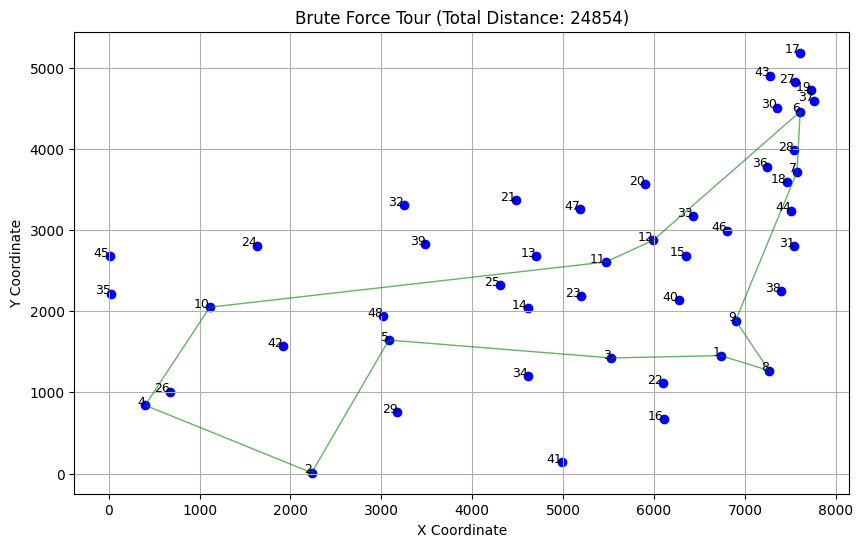

In [ ]:
# Visualize the Brute force tour
plt.figure(figsize=(10, 6))
plt.scatter(coordinates[:, 0], coordinates[:, 1], color='blue', marker='o')
for i, txt in enumerate(range(1, 49)):
    plt.annotate(txt, (coordinates[i, 0], coordinates[i, 1]), fontsize=9, ha='right')

tour_coords = coordinates[best_tour]
plt.plot(tour_coords[:, 0], tour_coords[:, 1], color='green', linestyle='-', linewidth=1, alpha=0.6)

plt.title(f"Brute Force Tour (Total Distance: {len_best_tour})")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.show()

# Heuristic


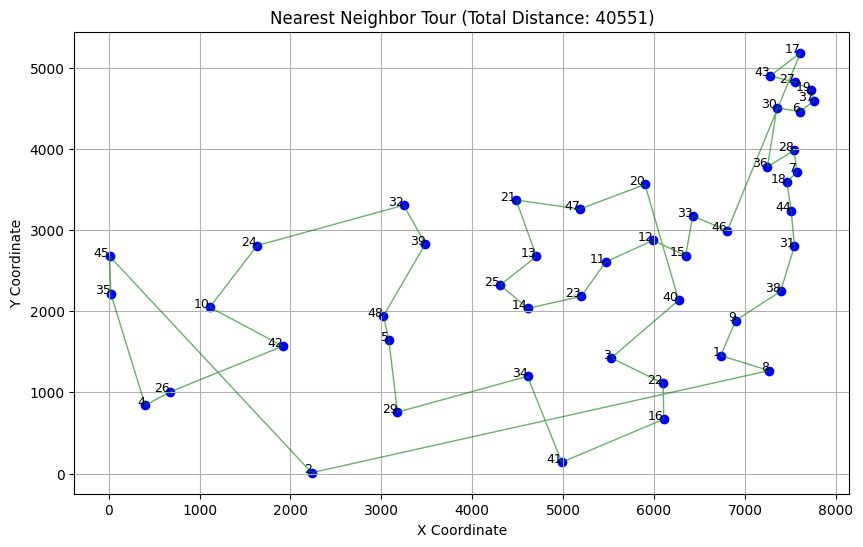

CPU times: user 474 ms, sys: 110 ms, total: 584 ms
Wall time: 471 ms


In [ ]:
%%time
def nearestNeighborTour(distanceMatrix, startCity=0):
    numCities = distanceMatrix.shape[0]
    unvisited = set(range(numCities))
    currentCity = startCity
    tour = [currentCity]

    # Marking the starting city as visited by removing it from the unvisited set
    unvisited.remove(currentCity)

    while unvisited:
        # Finding the nearest unvisited city to the current city
        nextCity = min(unvisited, key=lambda city: distanceMatrix[currentCity, city])
        tour.append(nextCity)
        # Marking the nearest city as visited by removing it from the unvisited set
        unvisited.remove(nextCity)
        currentCity = nextCity

    # After visiting all cities, return to the starting city to complete the tour
    tour.append(startCity)
    totalDistance = sum(distanceMatrix[tour[i], tour[i + 1]] for i in range(numCities))

    return tour, totalDistance

nnTour, nnDistance = nearestNeighborTour(distanceMatrix)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(coordinates[:, 0], coordinates[:, 1], color='blue', marker='o')
for i, txt in enumerate(range(1, 49)):
    plt.annotate(txt, (coordinates[i, 0], coordinates[i, 1]), fontsize=9, ha='right')

tour_coords = coordinates[nnTour]
plt.plot(tour_coords[:, 0], tour_coords[:, 1], color='green', linestyle='-', linewidth=1, alpha=0.6)

plt.title(f"Nearest Neighbor Tour (Total Distance: {nnDistance})")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.show()



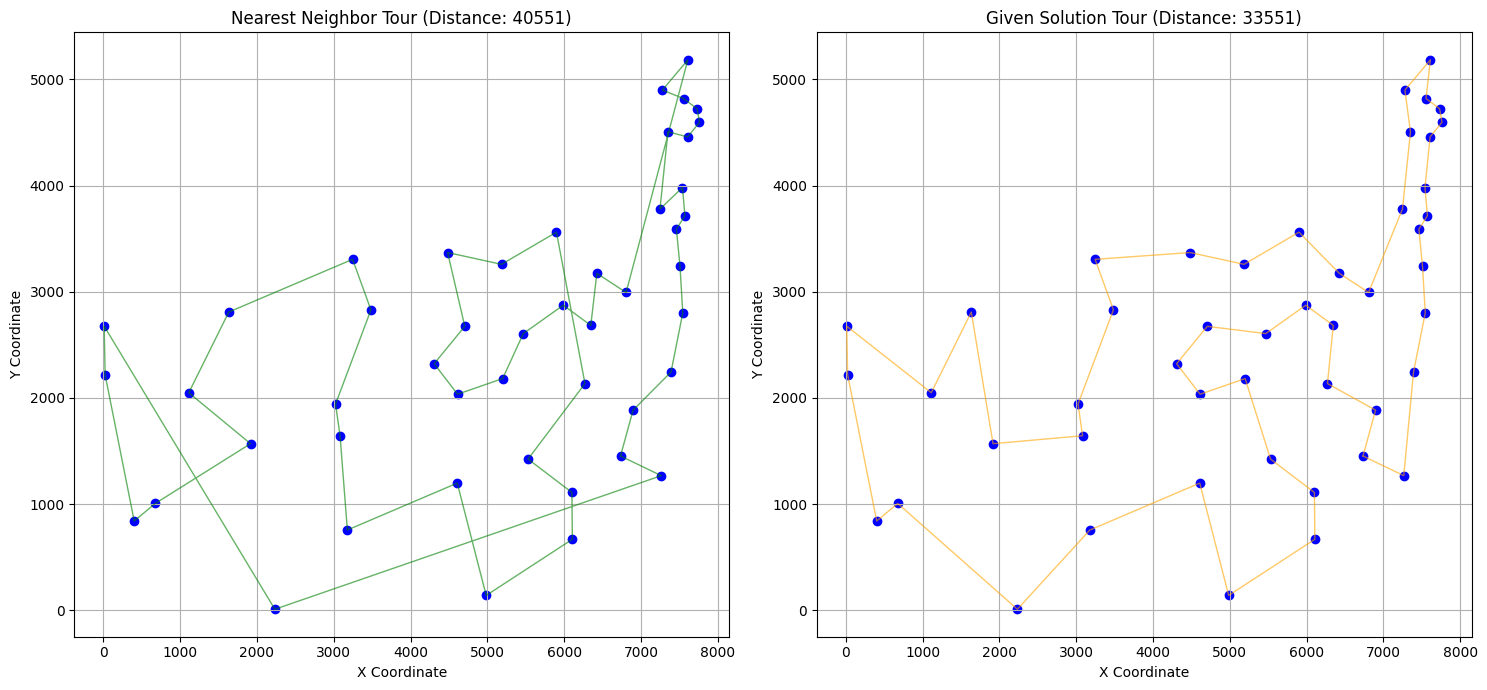

(40551, 33551)

In [ ]:
def computeTourDistanceAdjusted(tour, distanceMatrix):
    return sum(distanceMatrix[tour[i]-1, tour[i+1]-1] for i in range(len(tour) - 1))

givenDistance = computeTourDistanceAdjusted(solutionTour, distanceMatrix)

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Nearest Neighbor Tour
ax[0].scatter(coordinates[:, 0], coordinates[:, 1], color='blue', marker='o')
ax[0].plot(tour_coords[:, 0], tour_coords[:, 1], color='green', linestyle='-', linewidth=1, alpha=0.6)
ax[0].set_title(f"Nearest Neighbor Tour (Distance: {nnDistance})")

# Given Solution Tour
givenTourCoords = coordinates[solutionTour - 1]
ax[1].scatter(coordinates[:, 0], coordinates[:, 1], color='blue', marker='o')
ax[1].plot(givenTourCoords[:, 0], givenTourCoords[:, 1], color='orange', linestyle='-', linewidth=1, alpha=0.6)
ax[1].set_title(f"Given Solution Tour (Distance: {givenDistance})")

for i in range(2):
    ax[i].grid(True)
    ax[i].set_xlabel("X Coordinate")
    ax[i].set_ylabel("Y Coordinate")

plt.tight_layout()
plt.show()

nnDistance, givenDistance

# Dynamic Programming

In [ ]:
import numpy as np

def TSP_DP(distanceMatrix):
  n = distanceMatrix.shape[0]


  #table to store subproblem solution
  memo_table = np.full((1 << n, n), -1, dtype=int)
  #table to store next city to visit
  next_city_table = np.zeros((1 << n, n), dtype=int)

  def tsp_dyn(subset, i):

    #all cities visited
    if subset == (1 << n) - 1:
      return distanceMatrix[i][0]

    #look up already stored values
    if memo_table[subset][i] != -1:
      return memo_table[subset][i]

    minimum_cost = float('inf')

    for next_city in range(n):
      #city not already visited
      if (subset >> next_city) & 1 == 0:
        new_subset = subset | (1 << next_city)
        cost = distanceMatrix[i][next_city] + tsp_dyn(new_subset, next_city)

        #get minimum cost and store the next city to visit
        if cost < minimum_cost:
          minimum_cost = cost
          next_city_table[subset][i] = next_city

    #store the calculated cost
    memo_table[subset][i] = minimum_cost
    return minimum_cost

  #start with first city and mark as visited
  minimum_tour_cost = tsp_dyn(1, 0)

  # Reconstructing the tour using backtracking
  tour = [0]
  subset = 1
  current_city = 0
  while subset != (1 << n) - 1:
    next_city = next_city_table[subset][current_city]
    tour.append(next_city)
    subset |= 1 << next_city
    current_city = next_city
  tour.append(0)

  return minimum_tour_cost, tour

Min_Cost, tour = TSP_DP(distanceMatrix)
print(f"Length of Shortest Path: \n", Min_Cost)
print(f"Tour Path: \n",tour)

MemoryError: ignored

The above code doesn't execute for 48 cities as the memoization table takes up large amount of space

In [ ]:
%%time
#Program runs for 20 cities

import numpy as np

def TSP_DP(distanceMatrix):
  n = distanceMatrix.shape[0]
  n = n-28

  #table to store subproblem solution
  memo_table = np.full((1 << n, n), -1, dtype=int)
  #table to store next city to visit
  next_city_table = np.zeros((1 << n, n), dtype=int)

  def tsp_dyn(subset, i):

    #all cities visited
    if subset == (1 << n) - 1:
      return distanceMatrix[i][0]

    #look up already stored values
    if memo_table[subset][i] != -1:
      return memo_table[subset][i]

    minimum_cost = float('inf')

    for next_city in range(n):
      #city not already visited
      if (subset >> next_city) & 1 == 0:
        new_subset = subset | (1 << next_city)
        cost = distanceMatrix[i][next_city] + tsp_dyn(new_subset, next_city)

        #get minimum cost and store the next city to visit
        if cost < minimum_cost:
          minimum_cost = cost
          next_city_table[subset][i] = next_city

    #store the calculated cost
    memo_table[subset][i] = minimum_cost
    return minimum_cost

  #start with first city and mark as visited
  minimum_tour_cost = tsp_dyn(1, 0)

  # Reconstructing the tour using backtracking
  tour = [0]
  subset = 1
  current_city = 0
  while subset != (1 << n) - 1:
    next_city = next_city_table[subset][current_city]
    tour.append(next_city)
    subset |= 1 << next_city
    current_city = next_city
  tour.append(0)

  return minimum_tour_cost, tour

Min_Cost, tour = TSP_DP(distanceMatrix)
print(f"Length of Shortest Path: \n", Min_Cost)
print(f"Tour Path: \n",tour)


Length of Shortest Path: 
 22970
Tour Path: 
 [0, 7, 8, 14, 17, 6, 5, 18, 16, 19, 11, 10, 12, 13, 4, 9, 3, 1, 2, 15, 0]
CPU times: user 1min 39s, sys: 418 ms, total: 1min 39s
Wall time: 1min 40s


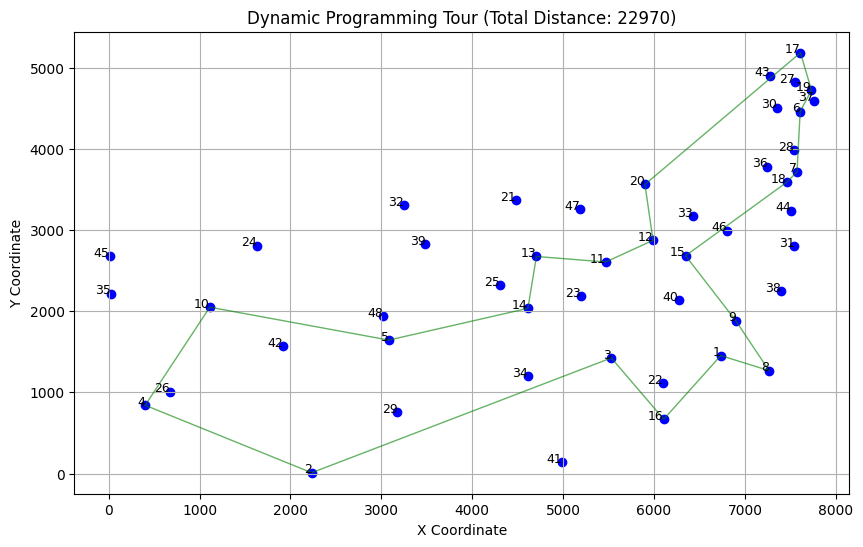

In [ ]:
# Visualize the Dynamic Programming tour with 20 cities
plt.figure(figsize=(10, 6))
plt.scatter(coordinates[:, 0], coordinates[:, 1], color='blue', marker='o')
for i, txt in enumerate(range(1, 49)):
    plt.annotate(txt, (coordinates[i, 0], coordinates[i, 1]), fontsize=9, ha='right')

tour_coords = coordinates[tour]
plt.plot(tour_coords[:, 0], tour_coords[:, 1], color='green', linestyle='-', linewidth=1, alpha=0.6)

plt.title(f"Dynamic Programming Tour (Total Distance: {Min_Cost})")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.show()

# ACO


In [ ]:
%%time
class Ant:
    def __init__(self, start_city, num_cities):
    # Initialize the ant with the starting city and total number of cities
        self.visited_cities = [start_city]
        self.current_city = start_city
        self.total_tour_length = 0
        self.num_cities = num_cities

    def visit_city(self, city, distance):
       # Add a new city to the ant's tour
        self.visited_cities.append(city)
        self.current_city = city
        self.total_tour_length += distance

    def tour_complete(self):
        return len(self.visited_cities) == self.num_cities


CPU times: user 27 µs, sys: 0 ns, total: 27 µs
Wall time: 30.5 µs


In [ ]:
%%time
def initialize_pheromone_matrix(num_cities, initial_pheromone):
    return np.full((num_cities, num_cities), initial_pheromone)


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.2 µs


In [ ]:
%%time
# Probability Calculation for Movement
def calculate_move_probabilities(ant, pheromone_matrix, distance_matrix, alpha, beta):
    probabilities = []
    for i in range(len(distance_matrix)):
      # univisited city
        if i not in ant.visited_cities:
          # pheromone level on the path from the ant's current city to city i is raised to the power of alpha
            pheromone = pheromone_matrix[ant.current_city][i] ** alpha

            # inverse of the distance from the current city to city i is raised to the power of beta
            inv_distance = (1.0 / distance_matrix[ant.current_city][i]) ** beta
            probabilities.append(pheromone * inv_distance)
        else:
            probabilities.append(0)
    sum_probabilities = sum(probabilities)
    probabilities = [p / sum_probabilities for p in probabilities]
    return probabilities


CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.3 µs


In [ ]:
%%time
def update_pheromones(pheromone_matrix, ants, evaporation_rate, pheromone_deposit):
    for i in range(len(pheromone_matrix)):
        for j in range(len(pheromone_matrix[i])):
            pheromone_matrix[i][j] *= (1 - evaporation_rate)
            for ant in ants:
                if i in ant.visited_cities and j in ant.visited_cities:
                    pheromone_matrix[i][j] += pheromone_deposit / ant.total_tour_length


CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs


In [ ]:
%%time
def ant_colony_optimization(num_cities, num_ants, num_iterations, alpha, beta, evaporation_rate, initial_pheromone, pheromone_deposit, distance_matrix):
    pheromone_matrix = initialize_pheromone_matrix(num_cities, initial_pheromone)
    best_tour_length = float('inf')
    best_tour = []

    for iteration in range(num_iterations):
        ants = [Ant(np.random.randint(num_cities), num_cities) for _ in range(num_ants)]
        for ant in ants:
            while not ant.tour_complete():
                probabilities = calculate_move_probabilities(ant, pheromone_matrix, distance_matrix, alpha, beta)
                next_city = np.random.choice(range(num_cities), p=probabilities)
                ant.visit_city(next_city, distance_matrix[ant.current_city][next_city])
            if ant.total_tour_length < best_tour_length:
                best_tour_length = ant.total_tour_length
                best_tour = ant.visited_cities
                # After all ants have completed their tours, update the pheromone levels on all paths
        update_pheromones(pheromone_matrix, ants, evaporation_rate, pheromone_deposit)

    return best_tour, best_tour_length



CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10.3 µs


In [ ]:
%%time
num_cities = len(distanceMatrix)
num_ants = 30                      # Number of ants
num_iterations = 100               # Number of iterations
alpha = 1.0                        # Influence of pheromone in probability calculation
beta = 5.0                         # Influence of distance in probability calculation
evaporation_rate = 0.5             # Pheromone evaporation rate
initial_pheromone = 0.1            # Initial pheromone level on paths
pheromone_deposit = 1000.0         # Pheromone deposit amount

aco_tour, aco_tour_length = ant_colony_optimization(
    num_cities, num_ants, num_iterations, alpha, beta,
    evaporation_rate, initial_pheromone, pheromone_deposit,
    distanceMatrix
)


print("Best Tour Length:", aco_tour_length)
print("Best Tour:", aco_tour)


Best Tour Length: 33962
Best Tour: [8, 0, 7, 37, 30, 43, 6, 17, 35, 5, 36, 18, 26, 16, 42, 29, 27, 45, 32, 19, 46, 10, 11, 14, 39, 2, 21, 15, 40, 33, 13, 24, 12, 22, 20, 31, 38, 47, 4, 28, 1, 41, 9, 44, 34, 3, 25, 23]
CPU times: user 58.9 s, sys: 427 ms, total: 59.3 s
Wall time: 59.4 s


In [ ]:
print("ACO Tour:", aco_tour)


ACO Tour: [8, 0, 7, 37, 30, 43, 6, 17, 35, 5, 36, 18, 26, 16, 42, 29, 27, 45, 32, 19, 46, 10, 11, 14, 39, 2, 21, 15, 40, 33, 13, 24, 12, 22, 20, 31, 38, 47, 4, 28, 1, 41, 9, 44, 34, 3, 25, 23]


In [ ]:
%%time
import numpy as np
import matplotlib.pyplot as plt

aco_tour_zero_based = [city - 1 for city in aco_tour]
solution_tour_zero_based = [city - 1 for city in solutionTour]

# Plot the cities
plt.scatter(coordinates[:, 0], coordinates[:, 1], color='blue', marker='o')
for i, txt in enumerate(range(1, 49)):
    plt.annotate(txt, (coordinates[i, 0], coordinates[i, 1]), fontsize=9, ha='right')

# Plot the ACO tour
aco_tour_coords = coordinates[aco_tour_zero_based]
plt.plot(aco_tour_coords[:, 0], aco_tour_coords[:, 1], color='green', linestyle='-', linewidth=1, alpha=0.6, label='ACO Tour')

# Plot the solution tour
solution_tour_coords = coordinates[solution_tour_zero_based]
plt.plot(solution_tour_coords[:, 0], solution_tour_coords[:, 1], color='red', linestyle='-', linewidth=1, alpha=0.6, label='Solution Tour')

plt.title("Comparison of ACO and Solution Tours")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.grid(True)
plt.show()


CPU times: user 23.7 ms, sys: 768 µs, total: 24.4 ms
Wall time: 52.2 ms


<IPython.core.display.Javascript object>

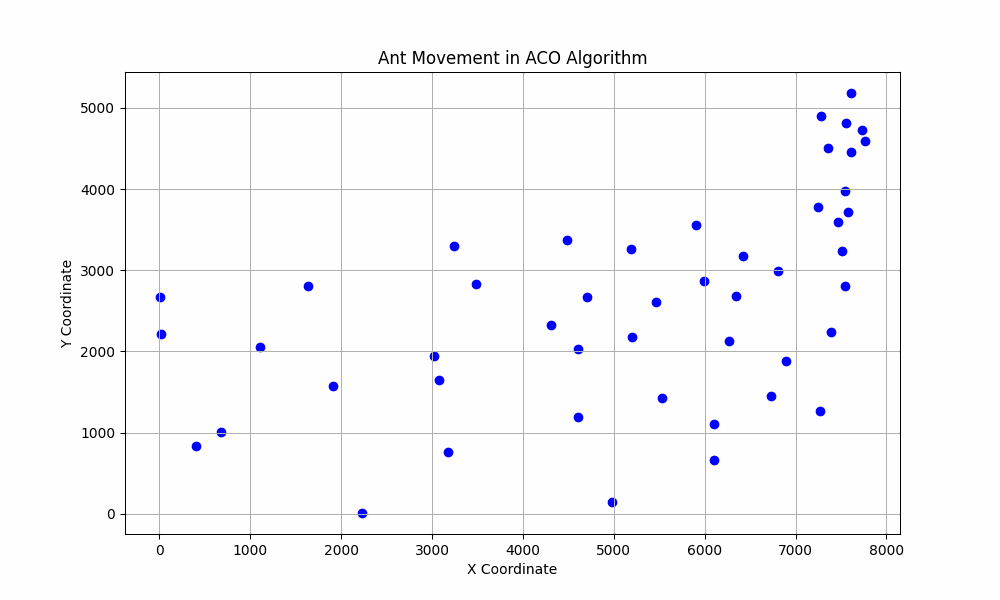

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Video
from IPython.display import Image

aco_tour = solutionTour - 1

def get_city_coords(city):
    return coordinates[city, 0], coordinates[city, 1]

def update(frame):
    plt.cla()

    plt.scatter(coordinates[:, 0], coordinates[:, 1], color='blue', marker='o')

    for i in range(frame):
        start_city = aco_tour[i]
        end_city = aco_tour[i + 1] if i + 1 < len(aco_tour) else aco_tour[0]
        start_x, start_y = get_city_coords(start_city)
        end_x, end_y = get_city_coords(end_city)
        plt.plot([start_x, end_x], [start_y, end_y], color='green')

    plt.title("Ant Movement in ACO Algorithm")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)

fig = plt.figure(figsize=(10, 6))
ani = animation.FuncAnimation(fig, update, frames=len(aco_tour), interval=200, repeat=False)
ani.save('aco_tour_animation.gif', writer='pillow')

# Display the video
Video('aco_tour_animation.gif')

plt.show()


# Display the GIF
Image('aco_tour_animation.gif')

# Exploratory algos
For comparison only

Christofides

In [ ]:
%%time
from heapq import heappop, heappush
def euclideanDistance(p1, p2):
        return ((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2) ** 0.5
def primMST(coordinates):
    """
    To find the Minimum Spanning Tree (MST) using Prim's algorithm
    """


    numVertices = len(coordinates)

    graph = {i: [] for i in range(numVertices)}
    for i in range(numVertices):
        for j in range(i + 1, numVertices):
            distance = euclideanDistance(coordinates[i], coordinates[j])
            graph[i].append((distance, j))
            graph[j].append((distance, i))

    mst = []
    visited = [False] * numVertices
    minHeap = [(0, 0, -1)]

    while minHeap:
        cost, u, parent = heappop(minHeap)
        if not visited[u]:
            visited[u] = True
            for edge in graph[u]:
                if not visited[edge[1]]:
                    heappush(minHeap, (edge[0], edge[1], u))
            if parent != -1:
                mst.append((parent, u))
    return mst

mstEdges = primMST(coordinates)
print(mstEdges[:5])


[(0, 8), (0, 7), (8, 37), (37, 30), (30, 43)]
CPU times: user 11.3 ms, sys: 1.09 ms, total: 12.4 ms
Wall time: 12.8 ms


In [ ]:
%%time
def findOddDegreeVertices(mstEdges, numVertices):
    degree = [0] * numVertices
    for _, vertex in mstEdges:
        degree[vertex] += 1
    oddVertices = [i for i, d in enumerate(degree) if d % 2 != 0]
    return oddVertices

oddVertices = findOddDegreeVertices(mstEdges, len(coordinates))
print("Vertices with odd degree:", oddVertices)


Vertices with odd degree: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]
CPU times: user 3.02 ms, sys: 144 µs, total: 3.17 ms
Wall time: 12 ms


## testing simplified matching, solution tour approx: 47000 units

In [ ]:
%%time
def simplifiedMatching(oddVertices, coordinates):
    # Calculate the Euclidean distance between two points
    def euclideanDistance(p1, p2):
        return ((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2) ** 0.5

    # Create a list of all possible pairs of odd-degree vertices with their distances
    pairs = []
    for i in range(len(oddVertices)):
        for j in range(i + 1, len(oddVertices)):
            dist = euclideanDistance(coordinates[oddVertices[i]], coordinates[oddVertices[j]])
            pairs.append((dist, oddVertices[i], oddVertices[j]))

    # Sort pairs based on distance
    pairs.sort()

    # Perform greedy matching
    matches = []
    matched = set()
    for dist, u, v in pairs:
        if u not in matched and v not in matched:
            matched.add(u)
            matched.add(v)
            matches.append((u, v))

    return matches

matches = simplifiedMatching(oddVertices, coordinates)
print("Matches:", matches)


Matches: [(18, 36), (6, 17), (5, 29), (26, 42), (4, 47), (3, 25), (27, 35), (11, 14), (13, 24), (32, 45), (30, 43), (15, 21), (34, 44), (10, 22), (31, 38), (8, 37), (20, 46), (9, 23), (2, 33), (1, 28), (7, 39), (12, 19), (40, 41)]
CPU times: user 9.64 ms, sys: 0 ns, total: 9.64 ms
Wall time: 16.8 ms


In [ ]:
print(mstEdges)

[(0, 8), (0, 7), (8, 37), (37, 30), (30, 43), (43, 17), (17, 6), (6, 27), (17, 35), (27, 5), (5, 36), (36, 18), (18, 26), (5, 29), (26, 42), (26, 16), (8, 39), (39, 14), (14, 11), (14, 32), (32, 45), (11, 10), (10, 22), (22, 13), (13, 24), (24, 12), (32, 19), (10, 46), (46, 20), (0, 21), (21, 15), (21, 2), (13, 33), (24, 38), (38, 31), (38, 47), (47, 4), (4, 28), (33, 40), (47, 41), (41, 9), (9, 23), (9, 34), (34, 44), (9, 25), (25, 3), (28, 1)]


## With Perfect matching

In [ ]:
%%time
import networkx as nx

G = nx.Graph()

for i in range(len(coordinates)):
    for j in range(i+1, len(coordinates)):
        if i != j:
            dist = euclideanDistance(coordinates[i], coordinates[j])
            G.add_edge(i, j, weight=dist)

odd_degree_nodes = [node for node, degree in G.degree() if degree % 2 == 1]

odd_degree_subgraph = G.subgraph(odd_degree_nodes)
matching = nx.algorithms.matching.min_weight_matching(odd_degree_subgraph)

matches = list(matching)
print("Matching Edges:", matches)

Matching Edges: [(15, 21), (2, 33), (3, 25), (31, 38), (11, 14), (9, 23), (8, 39), (32, 45), (6, 35), (36, 18), (0, 7), (5, 27), (4, 47), (28, 40), (26, 16), (46, 19), (20, 12), (1, 41), (29, 42), (34, 44), (10, 22), (30, 37), (17, 43), (13, 24)]
CPU times: user 527 ms, sys: 56.5 ms, total: 583 ms
Wall time: 956 ms


In [ ]:
def combineMSTAndMatching(mstEdges, matches):
    combinedGraph = {i: set() for i in range(len(coordinates))}
    for u, v in mstEdges:
        combinedGraph[u].add(v)
        combinedGraph[v].add(u)
    for u, v in matches:
        combinedGraph[u].add(v)
        combinedGraph[v].add(u)

    return combinedGraph

combinedGraph = combineMSTAndMatching(mstEdges, matches)


In [ ]:
%%time
def findEulerianCircuit(combinedGraph):
    circuit = []
    stack = [0]
    while stack:
        v = stack[-1]
        if combinedGraph[v]:
            u = combinedGraph[v].pop()
            combinedGraph[u].remove(v)
            stack.append(u)
        else:
            circuit.append(stack.pop())
    return circuit[::-1]

eulerianCircuit = findEulerianCircuit(combinedGraph)
print("Eulerian Circuit:", eulerianCircuit)


Eulerian Circuit: [0, 8, 39, 14, 32, 45, 19, 46, 10, 22, 13, 24, 38, 31, 47, 41, 1, 28, 4, 47, 40, 33, 13, 2, 21, 15, 0, 7, 9, 23, 25, 3, 34, 44, 12, 20, 46, 11, 14, 37, 30, 43, 17, 35, 6, 27, 5, 36, 18, 26, 42, 29, 5, 16, 17]
CPU times: user 1.86 ms, sys: 0 ns, total: 1.86 ms
Wall time: 4.03 ms


In [ ]:
%%time
def convertToHamiltonianCircuit(eulerianCircuit):
    visited = set()
    hamiltonianCircuit = []
    for vertex in eulerianCircuit:
        if vertex not in visited:
            visited.add(vertex)
            hamiltonianCircuit.append(vertex)
    return hamiltonianCircuit

hamiltonianCircuit = convertToHamiltonianCircuit(eulerianCircuit)
print("Hamiltonian Circuit:", hamiltonianCircuit)


Hamiltonian Circuit: [0, 8, 39, 14, 32, 45, 19, 46, 10, 22, 13, 24, 38, 31, 47, 41, 1, 28, 4, 40, 33, 2, 21, 15, 7, 9, 23, 25, 3, 34, 44, 12, 20, 11, 37, 30, 43, 17, 35, 6, 27, 5, 36, 18, 26, 42, 29, 16]
CPU times: user 2.44 ms, sys: 54 µs, total: 2.5 ms
Wall time: 2.79 ms


In [ ]:
%%time
def calculateTotalDistance(tour, coordinates):
    total_distance = 0
    for i in range(len(tour) - 1):
        x1, y1 = coordinates[tour[i]]
        x2, y2 = coordinates[tour[i + 1]]
        total_distance += ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
    return total_distance

total_distance = calculateTotalDistance(hamiltonianCircuit, coordinates)
print("Total Distance of Hamiltonian Circuit:", total_distance)


Total Distance of Hamiltonian Circuit: 45929.24761054572
CPU times: user 3.01 ms, sys: 0 ns, total: 3.01 ms
Wall time: 4.04 ms


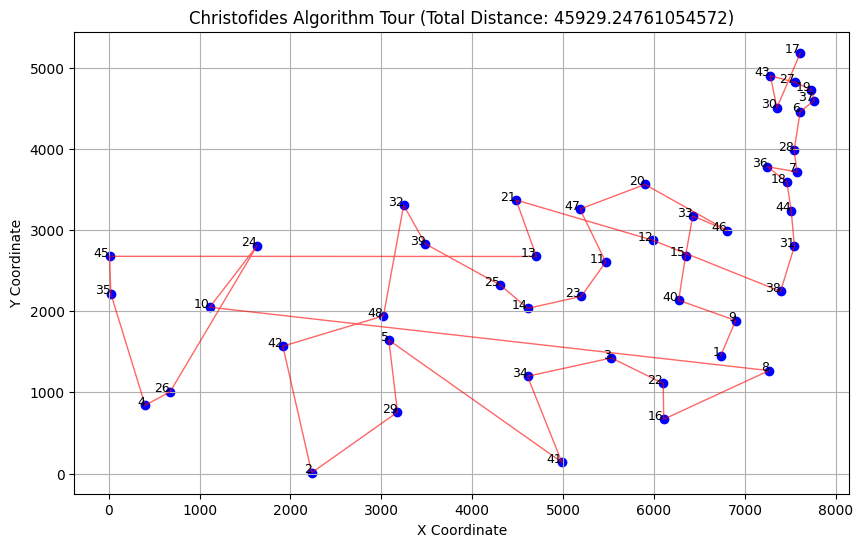

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(coordinates[:, 0], coordinates[:, 1], color='blue', marker='o')
for i, txt in enumerate(range(1, len(coordinates) + 1)):
    plt.annotate(txt, (coordinates[i, 0], coordinates[i, 1]), fontsize=9, ha='right')

tour_coords = coordinates[hamiltonianCircuit]
plt.plot(tour_coords[:, 0], tour_coords[:, 1], color='red', linestyle='-', linewidth=1, alpha=0.6)

plt.title(f"Christofides Algorithm Tour (Total Distance: {total_distance})")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.show()
